   # Shinnar-Le Roux RF Pulse Design with SigPy

In [1]:
%matplotlib notebook
import numpy as np
import sigpy as sp
import sigpy.mri as mr
import sigpy.mri.rf as rf
import sigpy.plot as pl
import scipy.signal as signal
import matplotlib.pyplot as pyplot

   ## Parameters for a time-bandwidth 4, linear-phase excitation

In [2]:
tb = 8
N = 128
d1 = 0.01
d2 = 0.01
ptype = 'ex'
ftype = 'ls'

   ## Design the excitation pulse

<IPython.core.display.Javascript object>


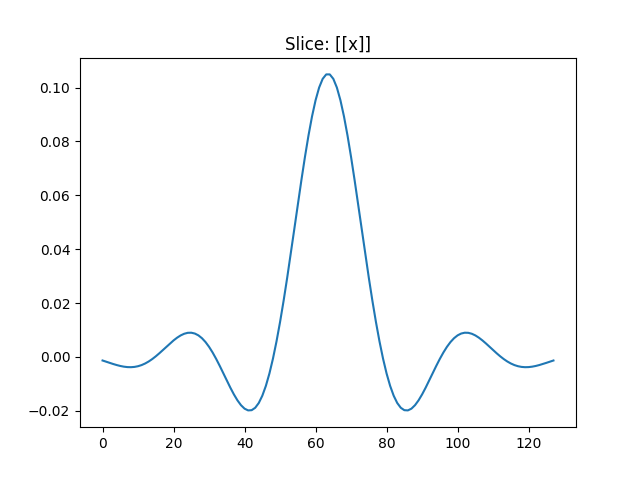

In [3]:
pulse = rf.slr.dzrf(N, tb, ptype, ftype, d1, d2, False)
pl.LinePlot(pulse, mode='r')

## Simulate the excitation pulse's Mxy profile

<IPython.core.display.Javascript object>


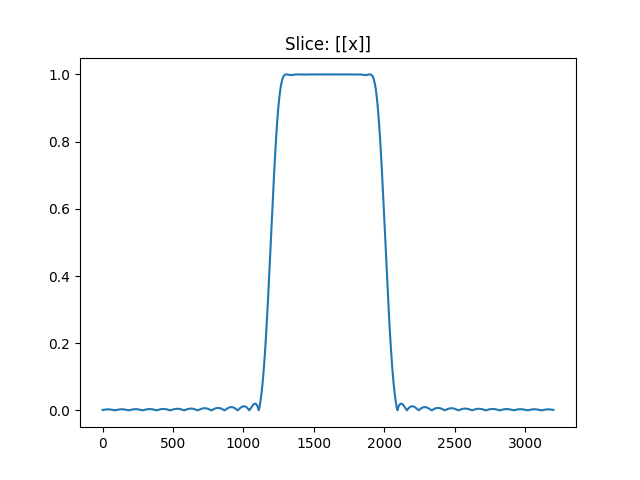

In [4]:
[a, b] = rf.sim.abrm(pulse, np.arange(-2*tb, 2*tb, 0.01), True)
Mxy = 2*np.multiply(np.conj(a), b)
pl.LinePlot(Mxy)

<IPython.core.display.Javascript object>


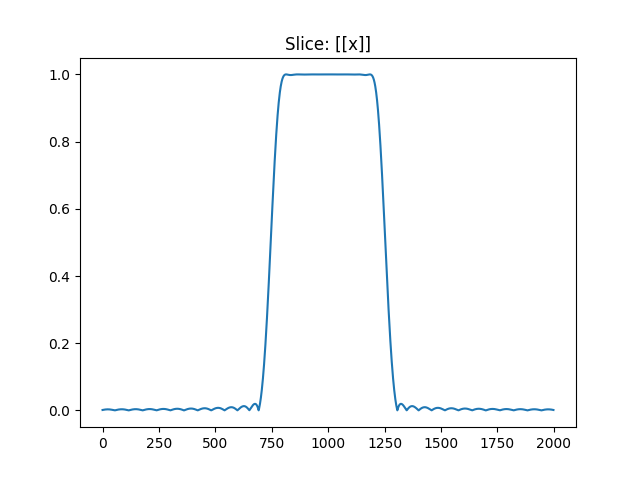

In [5]:
Nfreqs = 2000
mInit = np.repeat([[0, 0, 1]], Nfreqs, axis=0)
f0 = np.linspace(-2*tb/(N),2*tb/(N),Nfreqs)
t1 = np.full(Nfreqs, np.infty)
t2 = np.full(Nfreqs, np.infty)
dt = 1
mFinal = mr.bloch_forward(mInit, pulse, f0, t1, t2, dt)
pl.LinePlot(mFinal[:,0]+1j*mFinal[:,1],mode='m')

## Parameters for a time-bandwidth 8, minimum-phase inversion

In [6]:
tb = 8
N = 128
d1 = 0.01
d2 = 0.01
ptype = 'inv'
ftype = 'min'

## Design the inversion pulse

<IPython.core.display.Javascript object>


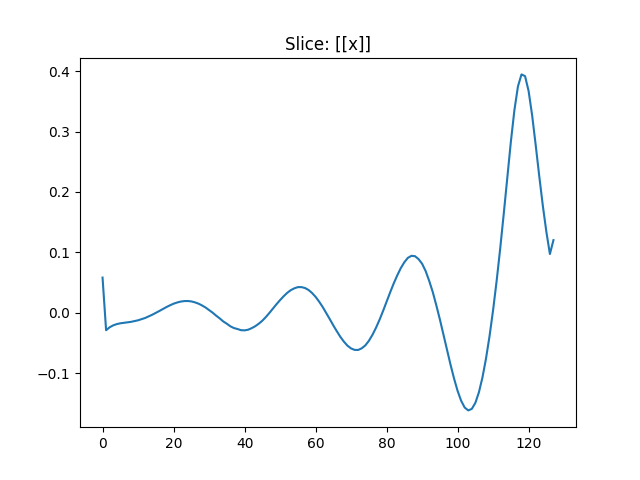

In [7]:
pulse = rf.slr.dzrf(N, tb, ptype, ftype, d1, d2)
pl.LinePlot(pulse, mode='r')

## Simulate the inversion pulse's Mz profile

<IPython.core.display.Javascript object>


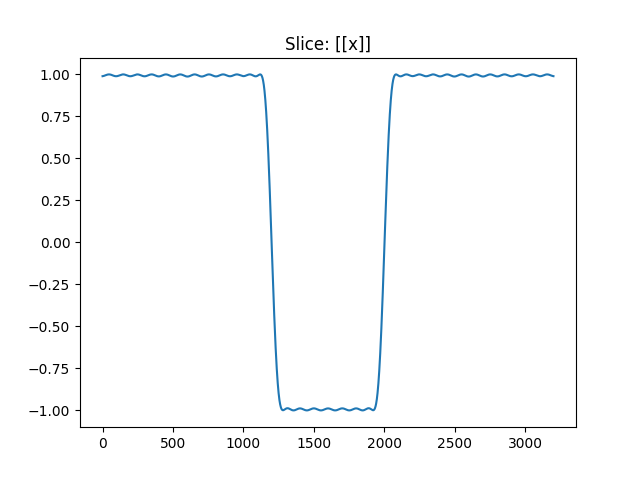

(3200,)


In [8]:
[a, b] = rf.sim.abrm(pulse, np.arange(-2*tb, 2*tb, 0.01))
Mz = 1-2*np.abs(b)**2
pl.LinePlot(Mz.T, mode='r')
print(np.shape(Mz))

<IPython.core.display.Javascript object>


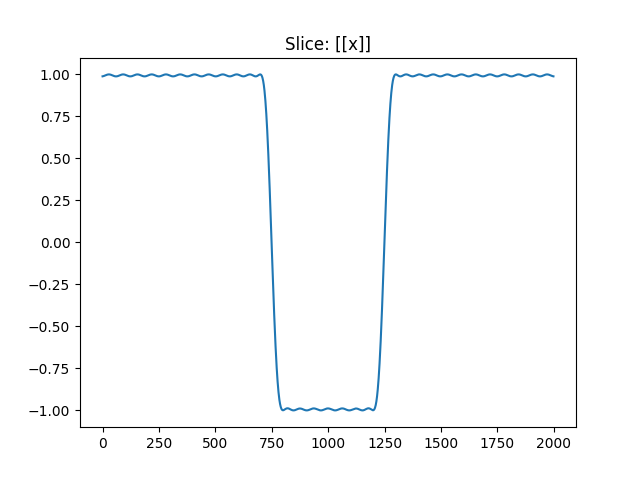

In [9]:
Nfreqs = 2000
mInit = np.repeat([[0, 0, 1]], Nfreqs, axis=0)
dt = 1
f0 = np.linspace(-2*tb/(N), 2*tb/(N), Nfreqs)
t1 = np.full(Nfreqs, np.infty)
t2 = np.full(Nfreqs, np.infty)
mFinal = mr.bloch_forward(mInit, pulse, f0, t1, t2, dt)
pl.LinePlot(mFinal[:,2], mode='r')

# Design a root-flipped saturation pulse

<IPython.core.display.Javascript object>


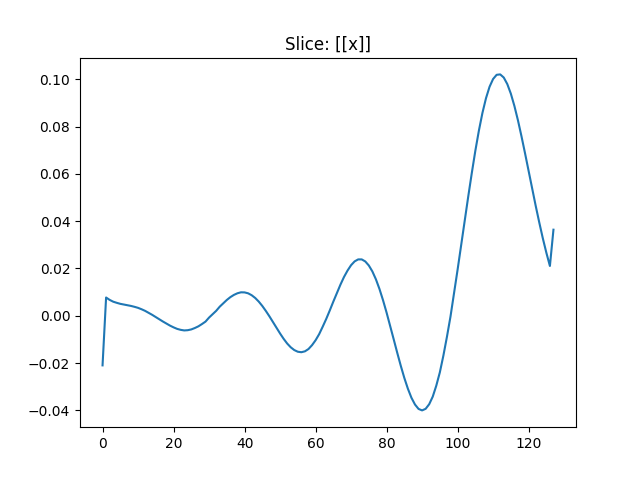

In [13]:
tb = 8
N = 128
d1 = 0.01
d2 = 0.001
ptype = 'sat'
ftype = 'min'
# conventional pulse
pulse = rf.slr.dzrf(N, tb, ptype, ftype, d1, d2)
pl.LinePlot(pulse, mode='r')

<IPython.core.display.Javascript object>


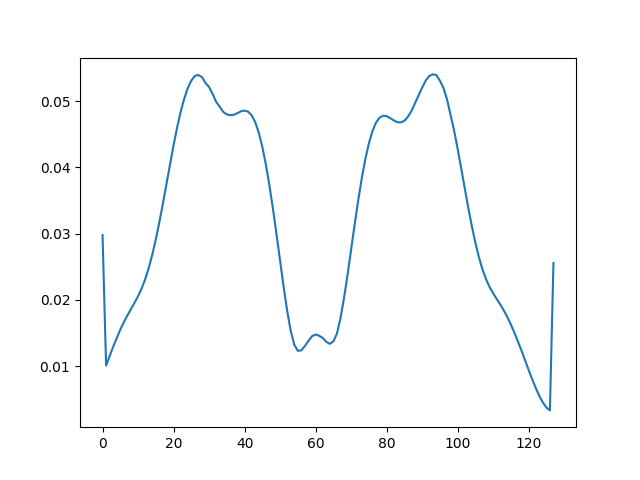

In [15]:
# root-flipped pulse
tb = 8
N = 128
d1 = 0.01
d2 = 0.001
flip = np.pi/2
ptype = 'sat'
[bsf, d1, d2] = rf.slr.calcRipples(ptype, d1, d2)
b = bsf*rf.slr.dzmp(N, tb, d1, d2)
b = b[::-1]
[pulse, bRootFlipped] = rf.slr.rootFlip(b, d1, flip, tb)

pyplot.figure()
pyplot.plot(np.abs(pulse))

# Recursive Pulse Design for a 3-Segment FLEET EPI scan

In [2]:
Nseg = 3 # number of EPI segments/RF Pulses
tb = 4
N = 2000
B = rf.slr.dzRecursiveRF(Nseg, tb, N)

<IPython.core.display.Javascript object>


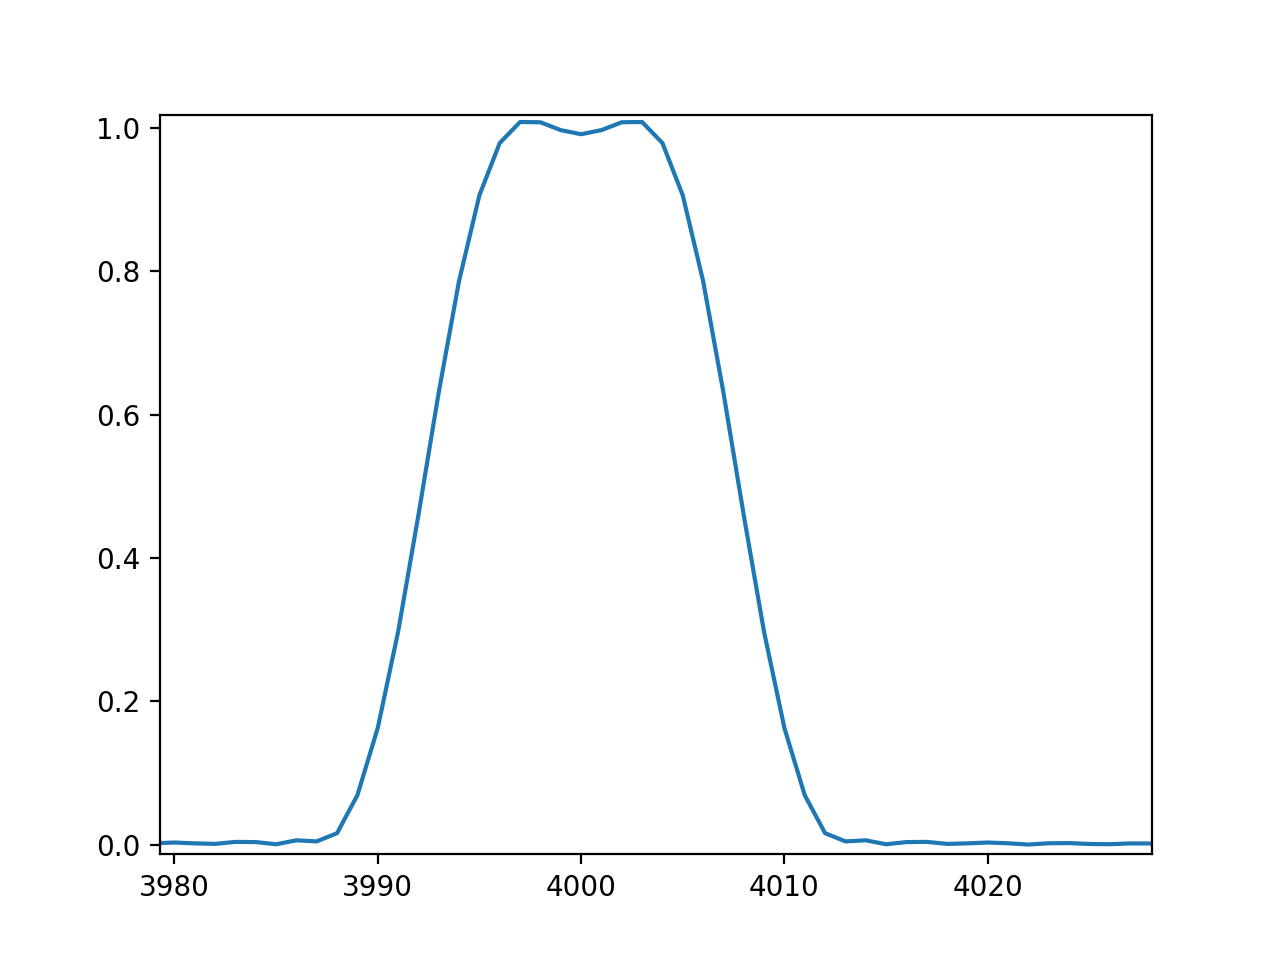

<IPython.core.display.Javascript object>


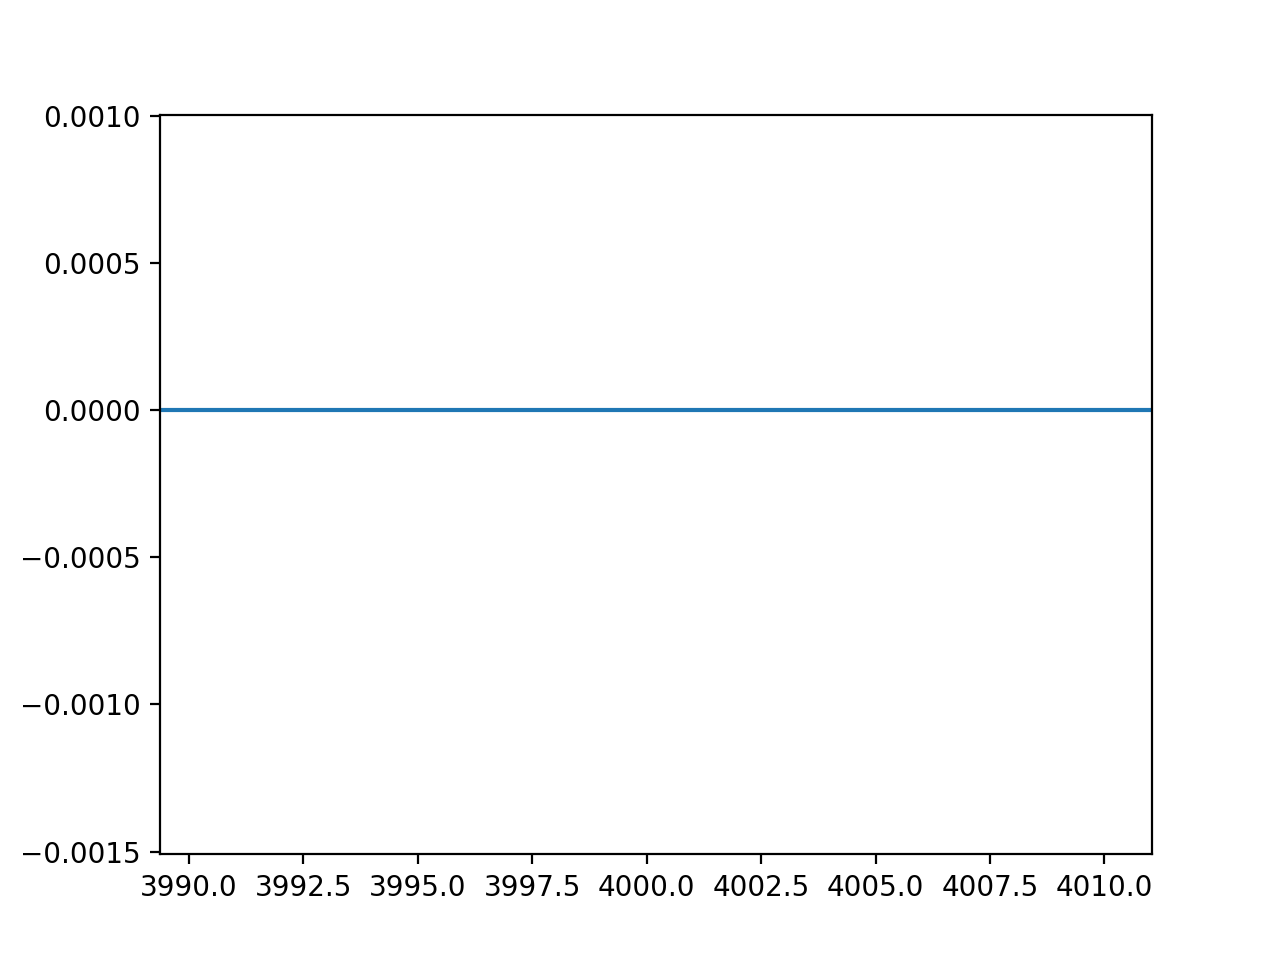

In [3]:
pyplot.figure()
pyplot.plot(np.abs(B))
pyplot.figure()
pyplot.plot(np.angle(B))
